In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
plt.style.use('seaborn-darkgrid')

In [49]:
presentacion = 'https://www.canva.com/design/DAFAzyXCJd0/-UbMAvKws2DWCxy0MGqKvA/view?utm_content=DAFAzyXCJd0&utm_campaign=designshare&utm_medium=link&utm_source=publishsharelink'

In [50]:
df_Tglobal = pd.read_csv('Cambio de temperaturas, por ciudad pais\GlobalTemperatures.csv')

In [51]:
df_Tglobal.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
df_co2 = pd.read_csv('emisiones co2\co2_emission.csv')
#Toneladas per capita

In [53]:
df_co2.head()

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


## Análisis del Dataset:
### Queremos realizar la evolución de las temperaturas globales con respecto al tiempo, con ello podemos deducir si realmente el cambio climático es algo real. Primero de todo analizaremos temperaturas globales, para poder ver en que manera está influyendo en nuestro territorio. 


In [54]:
df_Tglobal.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df_Tglobal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


### Debemos pasar la columna 'dt' a una columna de tipo fecha y convertirla en nuestro índice, esto nos hará que trabajemos de forma más sencilla con ella. También es importante ordenarla.

In [56]:
df_Global = df_Tglobal.copy()

In [57]:
df_Global['dt'] = pd.to_datetime(df_Global['dt'])
df_Global.set_index('dt', inplace= True)



In [58]:
df_Tglobal.sort_index(axis= 0, inplace= True)

df_Global.head(5)

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


#### Podemos apreciar que la frecuencia es mensual, por lo que podemos, con la función ``resample()``, reunir los datos en anuales para poder ver la evolución de una manera más visual

In [59]:
df_Global = df_Global.resample('Y').mean()
df_Global.index = df_Global.index.year
df_Global.index.rename('Anio', inplace = True)

In [60]:
df_Global.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
Anio,,,,,,,,
1750,8.719364,2.637818,NaN,NaN,NaN,NaN,NaN,NaN
1751,7.976143,2.781143,NaN,NaN,NaN,NaN,NaN,NaN
1752,5.779833,2.977000,NaN,NaN,NaN,NaN,NaN,NaN
1753,8.388083,3.176000,NaN,NaN,NaN,NaN,NaN,NaN
1754,8.469333,3.494250,NaN,NaN,NaN,NaN,NaN,NaN


### La columna 'LandAverageTemperature' mide la temperatura media de la superficie terrestre global, y la columna 'LandAndOceanAverageTemperature' mide la temperatura media de la superficie del océano y la superficie terrestre, a priori son nuestros datos más claves para ver como han evolucionado a lo largo del tiempo.

In [61]:
df_Global.rename(columns={'LandAverageTemperature':'TempMediaTerrestre',
                        'LandAndOceanAverageTemperature':'TempMediaOcean'},
               inplace=True)

df_Global.head()

,TempMediaTerrestre,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,TempMediaOcean,LandAndOceanAverageTemperatureUncertainty
Anio,,,,,,,,
1750,8.719364,2.637818,NaN,NaN,NaN,NaN,NaN,NaN
1751,7.976143,2.781143,NaN,NaN,NaN,NaN,NaN,NaN
1752,5.779833,2.977000,NaN,NaN,NaN,NaN,NaN,NaN
1753,8.388083,3.176000,NaN,NaN,NaN,NaN,NaN,NaN
1754,8.469333,3.494250,NaN,NaN,NaN,NaN,NaN,NaN


### Los indicadores ambientales vienen dados por:
#### 1. Índice de Calentamiento Global, donde se valora la variación en la temperatura a lo largo de todo el periodo analizado.

#### 2. Anomalía térmica media anual, es decir, la desviación de la temperatura media anual con respecto a la media de la serie.

### El índice del Calentamiento Global se calcula de la siguiente manera:

* #### Primera etapa: Cálculo de la anomalía media mensual
>$$AM(i) = Tmed(i) - Tmed$$
>
>siendo:
>AM(i) = Anomalía media anual  
>Tmed(i) = Temperatura media del año analizado  
>Tmed = Temperatura media anual de la serie  
  
* #### Segunda etapa: Cálculo del incremento medio anual con respecto al año anterior
>$$IAM = AM(i) + IAM(i-l)$$
>
>siendo:
>IAM = Incremento acumulado medio  
>AM(i) = Anomalía media anual
>IAM(i-l) = Anomalía media anual del año anterior

* #### Tercera etapa: Determinación del Índice de Calentamiento Global
>$$IGC =\dfrac{ Am(i) + IAM}{2}$$
>
>siendo:
>IGC = Índice de Calentamiento Global  
>AM(i) = Anomalía media anual   
>IAM = Incremento acumulado medio  

### Calculamos el Índice de Calentamiento Global para la temperatura terrestre y oceánica:

In [62]:
df_Global1 = df_Global[['TempMediaTerrestre', 'TempMediaOcean']]
print(df_Global1.isnull().sum()) #Podemos ver que tenemos 100 datos pérdidos para la columna de 'TempMediaOcean'
mask100 = df_Global1['TempMediaOcean'].isnull()
print(df_Global1[mask100].index) # Obnservamos que la serie de años perdidos viene desde 1750 a 1849, por lo que nos quedaremos con los datos de 1850 en adelante

TempMediaTerrestre      0
TempMediaOcean        100
dtype: int64
Int64Index([1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760,
            1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771,
            1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782,
            1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793,
            1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804,
            1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815,
            1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826,
            1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837,
            1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848,
            1849],
           dtype='int64', name='Anio')


In [63]:
df_Global1.dropna(inplace= True)

c:\Users\Usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [64]:
df_Global1.head()

,TempMediaTerrestre,TempMediaOcean
Anio,,
1850,7.900667,14.867167
1851,8.178583,14.991833
1852,8.100167,15.006500
1853,8.041833,14.955167
1854,8.210500,14.991000


In [65]:
# Calculamos las medias para la serie de cada variable

tempMediaTerr = df_Global1['TempMediaTerrestre'].mean()
tempMediaOcean = df_Global1['TempMediaOcean'].mean()

print(f'\t La temperatura media terrestre es de {round(tempMediaTerr, 2)} \n \t La temperatura media terrestre y oceánica es {round(tempMediaOcean, 2)}')

	 La temperatura media terrestre es de 8.57 
 	 La temperatura media terrestre y oceánica es 15.21


In [66]:
#Primera etapa: Crearemos una columna con la AM(i) (Anomalía media anual)
df_Global1['AM(i)_terr'] = abs(df_Global1['TempMediaTerrestre'].apply(lambda x: x - tempMediaTerr))

df_Global1['AM(i)_ocean'] = abs(df_Global1['TempMediaOcean'].apply(lambda x: x - tempMediaOcean))

df_Global1.head()

c:\Users\Usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\Usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,TempMediaTerrestre,TempMediaOcean,AM(i)_terr,AM(i)_ocean
Anio,,,,
1850,7.900667,14.867167,0.670916,0.345399
1851,8.178583,14.991833,0.392999,0.220732
1852,8.100167,15.006500,0.471416,0.206066
1853,8.041833,14.955167,0.529749,0.257399
1854,8.210500,14.991000,0.361083,0.221566


In [67]:
# Cálculo del incremento medio anual 
# Creamos las columnas de las series temporales

df_Global1['AM(i)_terrY+1'] = df_Global1['AM(i)_terr'].shift(1)

df_Global1['AM(i)_oceanY+1'] = df_Global1['AM(i)_ocean'].shift(1)

df_Global1.dropna(inplace= True)

df_Global1.head()


c:\Users\Usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\Usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\Usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

,TempMediaTerrestre,TempMediaOcean,AM(i)_terr,AM(i)_ocean,AM(i)_terrY+1,AM(i)_oceanY+1
Anio,,,,,,
1851,8.178583,14.991833,0.392999,0.220732,0.670916,0.345399
1852,8.100167,15.006500,0.471416,0.206066,0.392999,0.220732
1853,8.041833,14.955167,0.529749,0.257399,0.471416,0.206066
1854,8.210500,14.991000,0.361083,0.221566,0.529749,0.257399
1855,8.110750,15.021083,0.460833,0.191482,0.361083,0.221566


In [68]:
# Segunda etapa: Cálculo del incremento medio anual con respecto al año anterior
df_Global1['IAM_terr'] = abs(df_Global1['AM(i)_terr'] + df_Global1['AM(i)_terrY+1'])

df_Global1['IAM_ocean'] = abs(df_Global1['AM(i)_ocean'] + df_Global1['AM(i)_oceanY+1'])

df_Global1.head()

c:\Users\Usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\Usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,TempMediaTerrestre,TempMediaOcean,AM(i)_terr,AM(i)_ocean,AM(i)_terrY+1,AM(i)_oceanY+1,IAM_terr,IAM_ocean
Anio,,,,,,,,
1851,8.178583,14.991833,0.392999,0.220732,0.670916,0.345399,1.063916,0.566132
1852,8.100167,15.006500,0.471416,0.206066,0.392999,0.220732,0.864416,0.426798
1853,8.041833,14.955167,0.529749,0.257399,0.471416,0.206066,1.001166,0.463465
1854,8.210500,14.991000,0.361083,0.221566,0.529749,0.257399,0.890832,0.478965
1855,8.110750,15.021083,0.460833,0.191482,0.361083,0.221566,0.821916,0.413048


In [69]:
# Tercera etapa: Determinación del Índice de Calentamiento Global

df_Global1['IGC_terr'] = (df_Global1['AM(i)_terr'] + df_Global1['IAM_terr']) / 2

df_Global1['IGC_ocean'] = (df_Global1['AM(i)_ocean'] + df_Global1['IAM_ocean']) / 2

df_Global1.head()

c:\Users\Usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\Usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,TempMediaTerrestre,TempMediaOcean,AM(i)_terr,AM(i)_ocean,AM(i)_terrY+1,AM(i)_oceanY+1,IAM_terr,IAM_ocean,IGC_terr,IGC_ocean
Anio,,,,,,,,,,
1851,8.178583,14.991833,0.392999,0.220732,0.670916,0.345399,1.063916,0.566132,0.728458,0.393432
1852,8.100167,15.006500,0.471416,0.206066,0.392999,0.220732,0.864416,0.426798,0.667916,0.316432
1853,8.041833,14.955167,0.529749,0.257399,0.471416,0.206066,1.001166,0.463465,0.765458,0.360432
1854,8.210500,14.991000,0.361083,0.221566,0.529749,0.257399,0.890832,0.478965,0.625958,0.350265
1855,8.110750,15.021083,0.460833,0.191482,0.361083,0.221566,0.821916,0.413048,0.641374,0.302265


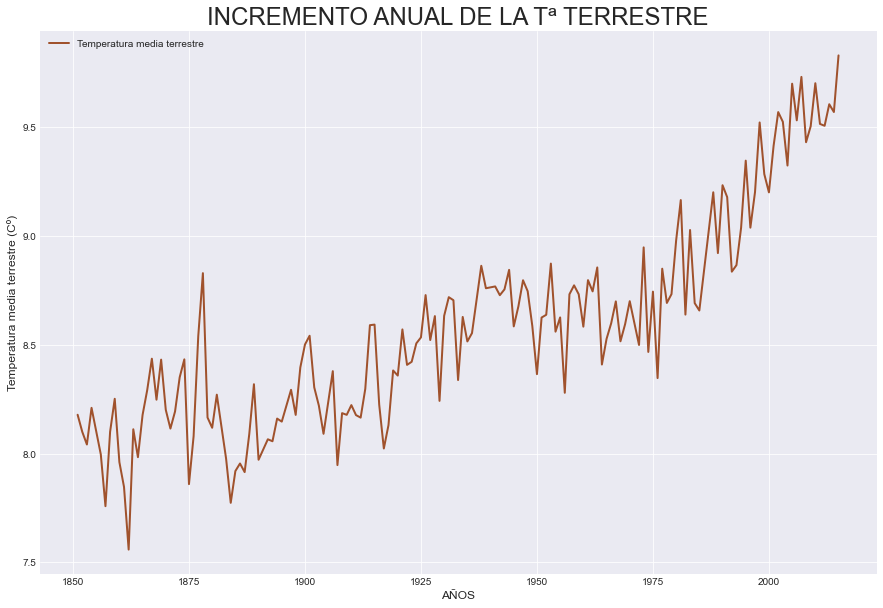

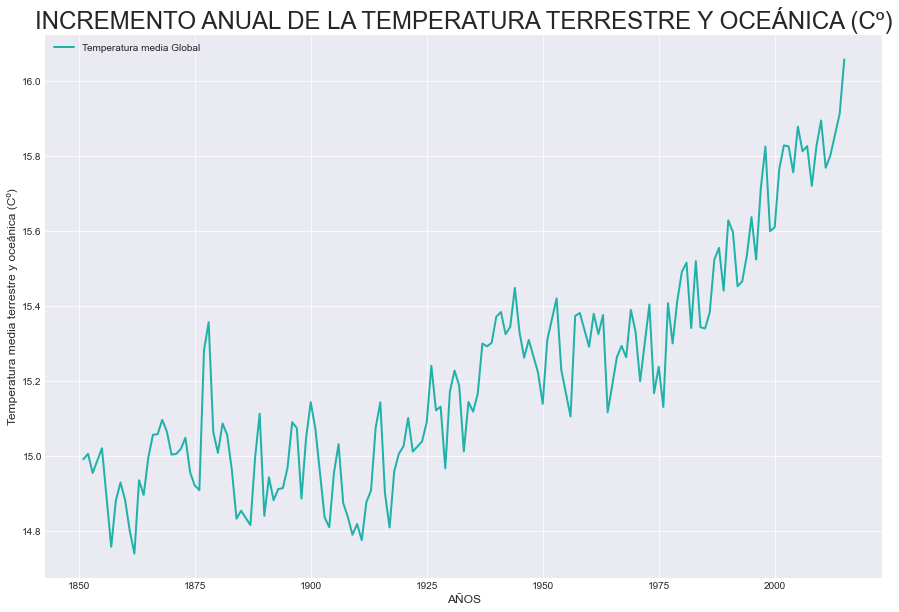

In [70]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df_Global1,
             x="Anio",
             y="TempMediaTerrestre",
            linewidth = 2,
            color = 'sienna',
            label = 'Temperatura media terrestre'
            )
plt.xlabel( "AÑOS" , size = 12 ) 
  
plt.ylabel( "Temperatura media terrestre (Cº)" , size = 12 ) 
  
plt.title( "INCREMENTO ANUAL DE LA Tª TERRESTRE" , size = 24 ) 

plt.legend(loc='upper left')

plt.figure(figsize=(15,10))
sns.lineplot(data=df_Global1,
              x="Anio",
             y="TempMediaOcean",
             linewidth = 2,
             color='lightseagreen',
             label = 'Temperatura media Global'
             )

plt.xlabel( "AÑOS" , size = 12 ) 
  
plt.ylabel( "Temperatura media terrestre y oceánica (Cº)" , size = 12 ) 
  
plt.title( "INCREMENTO ANUAL DE LA TEMPERATURA TERRESTRE Y OCEÁNICA (Cº)" , size = 24 ) 

plt.legend(loc='upper left');


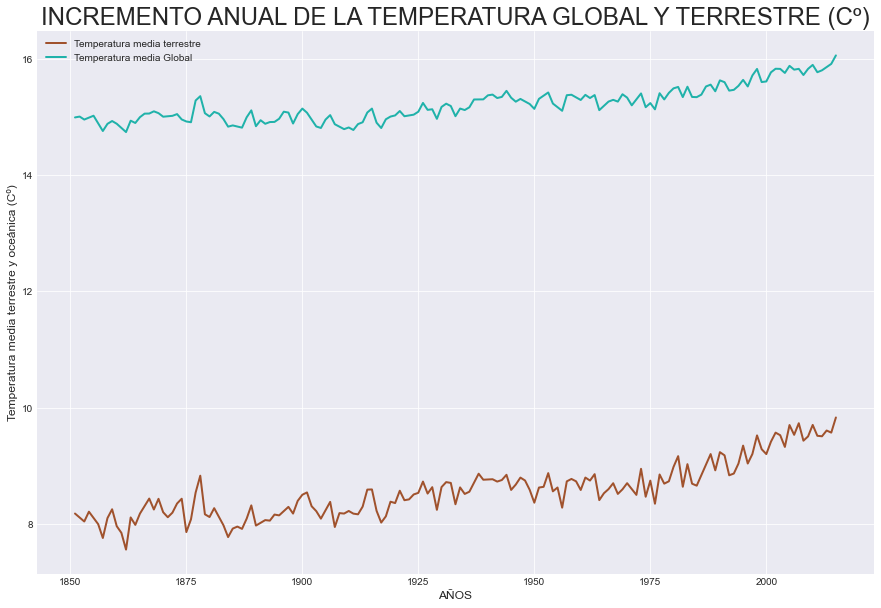

In [71]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df_Global1,
             x="Anio",
             y="TempMediaTerrestre",
            linewidth = 2,
            color = 'sienna',
            label = 'Temperatura media terrestre'
            )
plt.xlabel( "AÑOS" , size = 12 ) 
  
plt.ylabel( "Temperatura media terrestre (Cº)" , size = 12 ) 
  
plt.title( "INCREMENTO ANUAL DE LA Tª TERRESTRE" , size = 24 ) 

plt.legend(loc='upper left')

sns.lineplot(data=df_Global1,
              x="Anio",
             y="TempMediaOcean",
             linewidth = 2,
             color='lightseagreen',
             label = 'Temperatura media Global'
             )
             
plt.xlabel( "AÑOS" , size = 12 ) 
  
plt.ylabel( "Temperatura media terrestre y oceánica (Cº)" , size = 12 ) 
  
plt.title( "INCREMENTO ANUAL DE LA TEMPERATURA GLOBAL Y TERRESTRE (Cº)" , size = 24 ) 

plt.legend(loc='upper left');

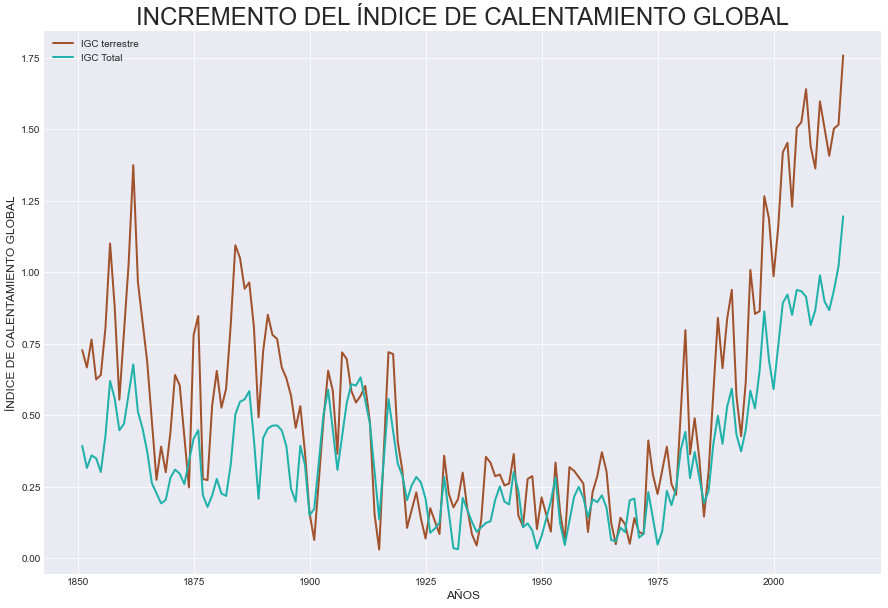

In [72]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df_Global1,
             x="Anio",
             y="IGC_terr",
            linewidth = 2,
            color = 'sienna',
            label= 'IGC terrestre'
            )
plt.xlabel( "AÑOS" , size = 12 ) 
  
plt.ylabel( "ÍNDICE DE CALENTAMIENTO GLOBAL" , size = 12 ) 
  
plt.title( "INCREMENTO DEL ÍNDICE DE CALENTAMIENTO GLOBAL" , size = 24 ) 


# plt.figure(figsize=(15,10))
sns.lineplot(data=df_Global1,
              x="Anio",
             y="IGC_ocean",
             linewidth = 2,
             color='lightseagreen',
             label= 'IGC Total'
             )

plt.xlabel( "AÑOS" , size = 12 ) 
  
plt.ylabel( "ÍNDICE DE CALENTAMIENTO GLOBAL" , size = 12 ) 
  
plt.title( "INCREMENTO DEL ÍNDICE DE CALENTAMIENTO GLOBAL" , size = 24 ) 

plt.legend(loc='upper left');

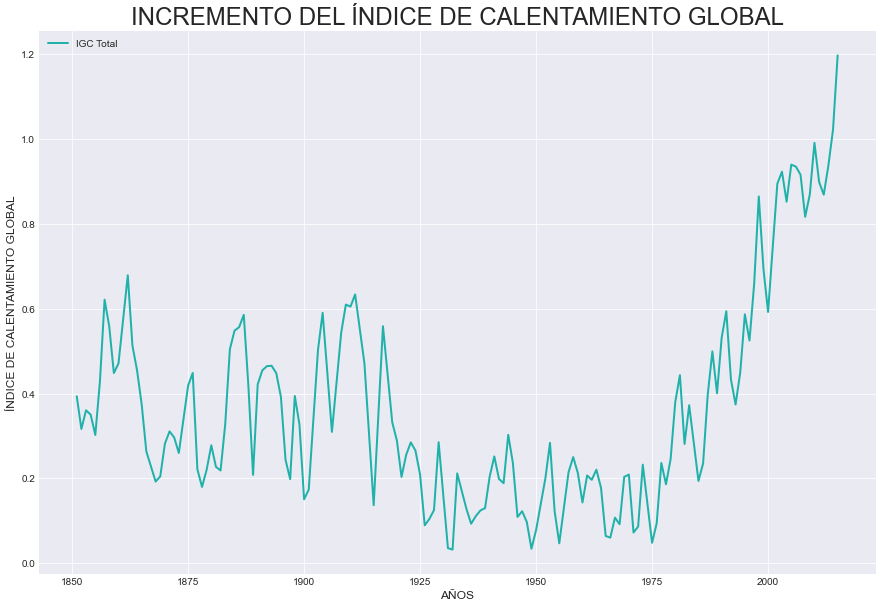

In [73]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df_Global1,
              x="Anio",
             y="IGC_ocean",
             linewidth = 2,
             color='lightseagreen',
             label= 'IGC Total'
             )

plt.xlabel( "AÑOS" , size = 12 ) 
  
plt.ylabel( "ÍNDICE DE CALENTAMIENTO GLOBAL" , size = 12 ) 
  
plt.title( "INCREMENTO DEL ÍNDICE DE CALENTAMIENTO GLOBAL" , size = 24 ) 

plt.legend(loc='upper left');

### Otra forma de verlo más interactiva

In [74]:

import plotly.graph_objs as go

# Creamos trace1
trace1 = go.Scatter(
                    x = df_Global1.index,
                    y = df_Global1.IGC_terr,
                    mode = "lines",
                    name = "IGC TERRESTRE",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= df_Global1.IGC_terr)
# Creamos trace2
trace2 = go.Scatter(
                    x = df_Global1.index,
                    y = df_Global1.IGC_ocean,
                    mode = "lines",
                    name = "IGC TERRESTRE y OCEÁNICO",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text= df_Global1.IGC_terr)

data = [trace1, trace2]
layout = dict(title = 'INCREMENTO DEL ÍNDICE DE CALENTAMIENTO GLOBAL',
              xaxis= dict(title= 'AÑOS',ticklen= 5)
             )

fig = go.Figure(dict(data = data, layout = layout))

iplot(fig)

### COMPARACÍON DEL ÍNDICE DE CALENTAMIENTO GLOBAL (IGC) CON EMISIONES DE CO2 DESDE 1949

#### A continuación transformaremos el dataset sobre emisiones de CO2 por países, para poder sacar una información global y así poder comparar las emisiones de CO2 con el IGC

In [75]:
df_co2.head()

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [76]:
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20853 entries, 0 to 20852
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Entity                          20853 non-null  object 
 1   Code                            18646 non-null  object 
 2   Year                            20853 non-null  int64  
 3   Annual CO₂ emissions (tonnes )  20853 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 651.8+ KB


In [77]:
# Pasamos la columna 'Year' a una columna de tipo 'datetime' y nos quedaremos solo con el año

df_co2['Year'] = pd.to_datetime(df_co2['Year'], format= '%Y')
df_co2.Year = df_co2.Year.apply(lambda x: x.year)
df_co2.head()

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [78]:
# Hacemos una copia y agrupamos por año
df_co2Global = df_co2.copy()
df_co2Global = df_co2Global.groupby('Year').sum()
df_co2Global

,Annual CO₂ emissions (tonnes )
Year,
1751,2.805158e+07
1752,2.806258e+07
1753,2.806258e+07
1754,2.807357e+07
1755,2.808456e+07
...,...
2013,8.700745e+10
2014,8.762096e+10
2015,8.768655e+10


In [79]:
df_co2Global.rename(columns={'Annual CO₂ emissions (tonnes )':'Co2_emissions'},
                    inplace=True)

### Unimos los dos dataset usando los años en común para poder comparar las emisiones de CO2 con el Índice de Calentamiento Global.

In [80]:
df_union = df_co2Global.merge(df_Global1, how= 'inner', left_index= True, right_index= True)

In [81]:
df_union

,Co2_emissions,TempMediaTerrestre,TempMediaOcean,AM(i)_terr,AM(i)_ocean,AM(i)_terrY+1,AM(i)_oceanY+1,IAM_terr,IAM_ocean,IGC_terr,IGC_ocean
1851,5.717196e+08,8.178583,14.991833,0.392999,0.220732,0.670916,0.345399,1.063916,0.566132,0.728458,0.393432
1852,5.958140e+08,8.100167,15.006500,0.471416,0.206066,0.392999,0.220732,0.864416,0.426798,0.667916,0.316432
1853,6.213594e+08,8.041833,14.955167,0.529749,0.257399,0.471416,0.206066,1.001166,0.463465,0.765458,0.360432
1854,7.321332e+08,8.210500,14.991000,0.361083,0.221566,0.529749,0.257399,0.890832,0.478965,0.625958,0.350265
1855,7.418501e+08,8.110750,15.021083,0.460833,0.191482,0.361083,0.221566,0.821916,0.413048,0.641374,0.302265
...,...,...,...,...,...,...,...,...,...,...,...
2011,8.524361e+10,9.516000,15.769500,0.944417,0.556934,1.131501,0.682934,2.075918,1.239868,1.510167,0.898401
2012,8.665080e+10,9.507333,15.802333,0.935751,0.589768,0.944417,0.556934,1.880168,1.146702,1.407959,0.868235
2013,8.700745e+10,9.606500,15.854417,1.034917,0.641851,0.935751,0.589768,1.970668,1.231618,1.502792,0.936735
2014,8.762096e+10,9.570667,15.913000,0.999084,0.700434,1.034917,0.641851,2.034001,1.342285,1.516542,1.021360


In [82]:
df_union.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 1851 to 2015
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Co2_emissions       165 non-null    float64
 1   TempMediaTerrestre  165 non-null    float64
 2   TempMediaOcean      165 non-null    float64
 3   AM(i)_terr          165 non-null    float64
 4   AM(i)_ocean         165 non-null    float64
 5   AM(i)_terrY+1       165 non-null    float64
 6   AM(i)_oceanY+1      165 non-null    float64
 7   IAM_terr            165 non-null    float64
 8   IAM_ocean           165 non-null    float64
 9   IGC_terr            165 non-null    float64
 10  IGC_ocean           165 non-null    float64
dtypes: float64(11)
memory usage: 15.5 KB


### Trazamos el gráfico de emisiones de CO2 por año

In [83]:
trace3 = go.Scatter(
                    x = df_union.index,
                    y = df_union.Co2_emissions,
                    mode = "lines",
                    name = "Emisiones de CO2",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= df_Global1.IGC_terr)

data = [trace3]
layout = dict(title = 'EMISIONES DE CO2 POR AÑO',
              xaxis= dict(title= 'AÑOS',ticklen= 5),
              yaxis= dict(title= 'Toneladas')
             )
 
fig = go.Figure(dict(data = data, layout = layout))

iplot(fig)

### Comparamos las emisiones de CO2 con el Índice de Calentamiento Global

#### Podemos deducir que está relacionado, ya que mientras el Índice de Calentamiento Global ha aunmentado, han aumentado también, en una medida similar, las emisiones de CO2

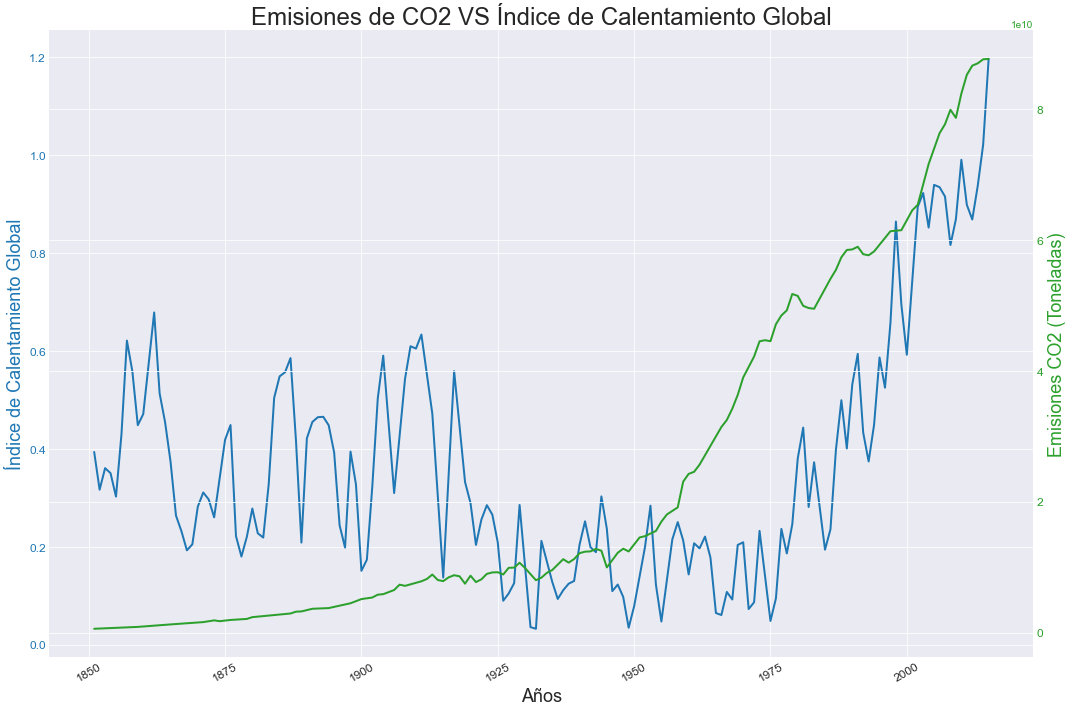

In [84]:
y1 = df_union.IGC_ocean
y2 = df_union.Co2_emissions


fig, ax1 = plt.subplots(figsize=(15,10))


color = 'tab:blue'
ax1.set_xlabel('Años', size = 18)
ax1.set_ylabel('Índice de Calentamiento Global', color=color, size = 18)
ax1.plot(df_union.index, y1, color=color,  linewidth = 2)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(fontsize=12, rotation= 30)
plt.yticks(fontsize=12)
ax2 = ax1.twinx()  

color = 'tab:green'
ax2.set_ylabel('Emisiones CO2 (Toneladas)', color=color, size= 18)  
ax2.plot(df_union.index, y2, color=color,  linewidth = 2)
ax2.tick_params(axis='y', labelcolor=color)
plt.yticks(fontsize=12)

plt.title( "Emisiones de CO2 VS Índice de Calentamiento Global" , size = 24 ) 

fig.tight_layout()
plt.show()

### El análisis del índice de calentamiento global varía en función de la escala temporal que se aplique
### Periodo base utilizado por la NASA: La temperatura media durante el periodo de 30 años 1951-1980
### En 30 años se puede observar que existe una alta correlación entre las emisiones de CO2 e indicadores del cambio climático

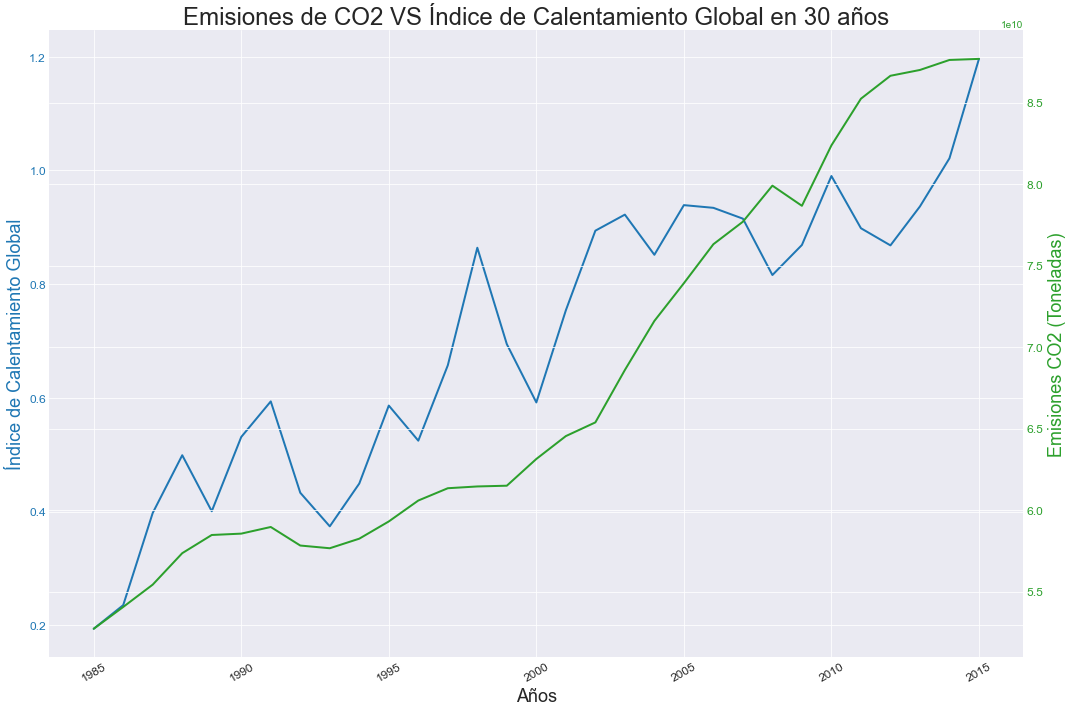

In [85]:
mask_1985 = df_union.index > 1984

y1 = df_union[mask_1985].IGC_ocean
y2 = df_union[mask_1985].Co2_emissions


fig, ax1 = plt.subplots(figsize=(15,10))


color = 'tab:blue'
ax1.set_xlabel('Años', size = 18)
ax1.set_ylabel('Índice de Calentamiento Global', color=color, size = 18)
ax1.plot(df_union[mask_1985].index, y1, color=color,  linewidth = 2)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(fontsize=12, rotation= 30)
plt.yticks(fontsize=12)
ax2 = ax1.twinx()  

color = 'tab:green'
ax2.set_ylabel('Emisiones CO2 (Toneladas)', color=color, size= 18)  
ax2.plot(df_union[mask_1985].index, y2, color=color,  linewidth = 2)
ax2.tick_params(axis='y', labelcolor=color)
plt.yticks(fontsize=12)

plt.title( "Emisiones de CO2 VS Índice de Calentamiento Global en 30 años" , size = 24 ) 

fig.tight_layout()
plt.show()

#### Como deducíamos existe una correlación entre el Índice de Calentamiento Global y las emisiones de CO2

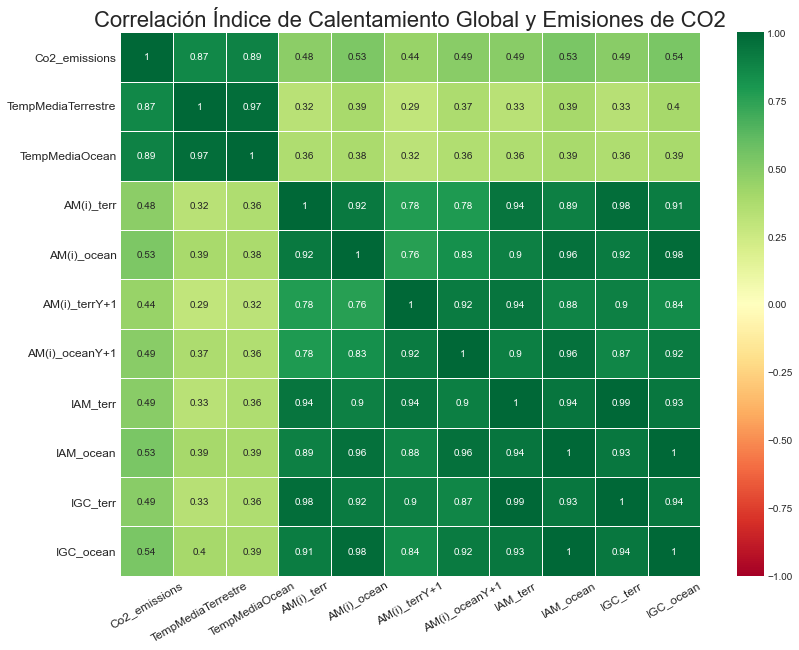

In [86]:
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(df_union.corr(),
            annot=True,
            linewidths=.5,
            ax=ax,
            vmin=-1,
            vmax=1,
            cmap='RdYlGn')

plt.title('Correlación Índice de Calentamiento Global y Emisiones de CO2', fontsize=22)
plt.xticks(fontsize=12, rotation = 30)
plt.yticks(fontsize=12)
plt.show()

### Correlación Índice de Calentamiento Global y Emisiones de CO2 en 30 años

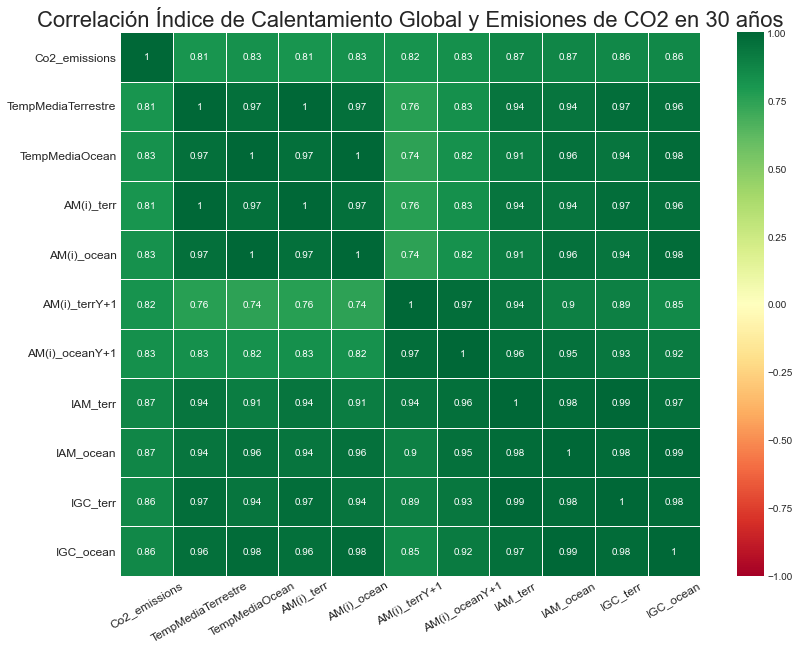

In [87]:
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(df_union[mask_1985].corr(),
            annot=True,
            linewidths=.5,
            ax=ax,
            vmin=-1,
            vmax=1,
            cmap='RdYlGn')

plt.title('Correlación Índice de Calentamiento Global y Emisiones de CO2 en 30 años', fontsize=22)
plt.xticks(fontsize=12, rotation = 30)
plt.yticks(fontsize=12)
plt.show()